In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import sklearn
from sklearn.preprocessing import StandardScaler


In [9]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [10]:
df = df[df["IsTrading"] == True]
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [11]:
df = df.drop(columns=["IsTrading"])
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [12]:
df = df.dropna()
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [13]:
df = df[df["TotalCoinsMined"] > 0]
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [14]:
df = df.drop(columns=["CoinName"])
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [18]:
df['Algorithm'] = LabelEncoder().fit_transform(df['Algorithm'])
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,52,PoW/PoS,4.199995e+01,42
2,404,52,PoW/PoS,1.055185e+09,532000000
5,1337,66,PoW/PoS,2.927942e+10,314159265359
7,BTC,47,PoW,1.792718e+07,21000000
8,ETH,20,PoW,1.076842e+08,0


In [20]:
df['ProofType'] = LabelEncoder().fit_transform(df['ProofType'])
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,52,15,4.199995e+01,42
2,404,52,15,1.055185e+09,532000000
5,1337,66,15,2.927942e+10,314159265359
7,BTC,47,12,1.792718e+07,21000000
8,ETH,20,12,1.076842e+08,0


In [22]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52,15,4.199995e+01,42
2,52,15,1.055185e+09,532000000
5,66,15,2.927942e+10,314159265359
7,47,12,1.792718e+07,21000000
8,20,12,1.076842e+08,0


In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data[0:10])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]
 [ 3.76459118e-01  1.67233875e-03 -1.15725815e-01 -1.51629040e-01]
 [ 1.09558390e+00  8.91356555e-01 -1.16910129e-01 -1.52545207e-01]
 [-2.02062348e+00  1.67233875e-03 -1.16730976e-01 -1.52870298e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14622363e-01 -1.49767153e-01]
 [-1.66106109e+00  1.67233875e-03 -1.16946272e-01 -1.52559984e-01]]


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_crypto = pca.fit_transform(df)

In [26]:
pca_df = pd.DataFrame(
    data=pca_crypto, index= df.index, columns=["component 1", "component 2"])
pca_df.head()

,component 1,component 2
0,-1.162934e+10,-5.502574e+08
2,-1.064088e+10,-1.197852e+09
5,2.750507e+11,1.312370e+11
7,-1.160219e+10,-5.552767e+08
8,-1.157548e+10,-6.435026e+08


In [27]:
pca.explained_variance_ratio_

array([0.87571706, 0.12428294])

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate =250)
tsne_features = tsne.fit_transform(pca_df)

In [31]:
tsne_features.shape

(532, 2)

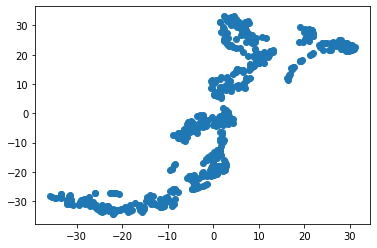

In [32]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [33]:
from sklearn.cluster import KMeans

In [38]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23
5,6,7.859803e+22
6,7,5.562825e+22
7,8,4.047269e+22
8,9,2.972836e+22
9,10,2.174527e+22


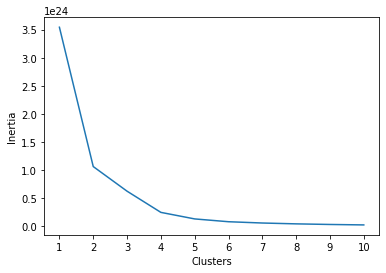

In [39]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()